# Importing necessery libraries

In [2]:
#importing necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [3]:
airbnb=pd.read_csv('AB_NYC_2019.csv')
#viewing the head of dataset
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Show number of (rows, columes) in dataset

In [4]:
airbnb.shape

(48895, 16)

# Show type of every column

In [5]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Dropping

In [7]:
#dropping columns that are not significant and contain more than 20% NaN
airbnb.drop(['id','name','host_name','latitude','longitude','last_review'], axis=1, inplace=True)
#viewing the changes
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [8]:
#filling NaN values in reviews_per_month by 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#viewing the changes
airbnb.reviews_per_month.isnull().sum()

0

In [9]:
#drop NaN values in airbnb dataframe
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #get summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 10 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [10]:
#viewing the continous variables
airbnb.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Visualizing Data

In [11]:
#viewing the unique values of n_group
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
#viewing the unique values of neighborhood
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [13]:
#viewing the unique values of room_type 
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Q1. The top 10 hosts who have the most listings on Airbnb

In [14]:
top_hosts_id=airbnb.host_id.value_counts().head(10)
top_hosts_id

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [15]:
#setting figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

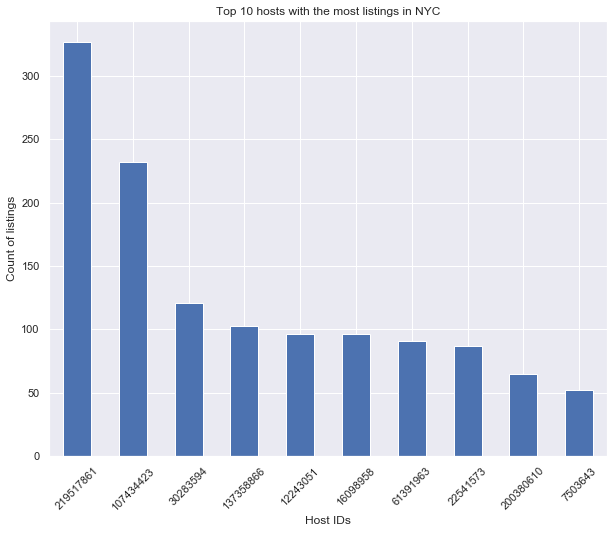

In [16]:
#chossing type of plot and lables and title for the plot
figure_1=top_hosts_id.plot(kind='bar')
figure_1.set_title('Top 10 hosts with the most listings in NYC')
figure_1.set_ylabel('Count of listings')
figure_1.set_xlabel('Host IDs')
figure_1.set_xticklabels(figure_1.get_xticklabels(), rotation=45)

# Q2. The top 5 most popular neighborhoods in NYC

In [17]:
top_neighbourhoods=airbnb.neighbourhood.value_counts().head(5)
top_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper West Side')]

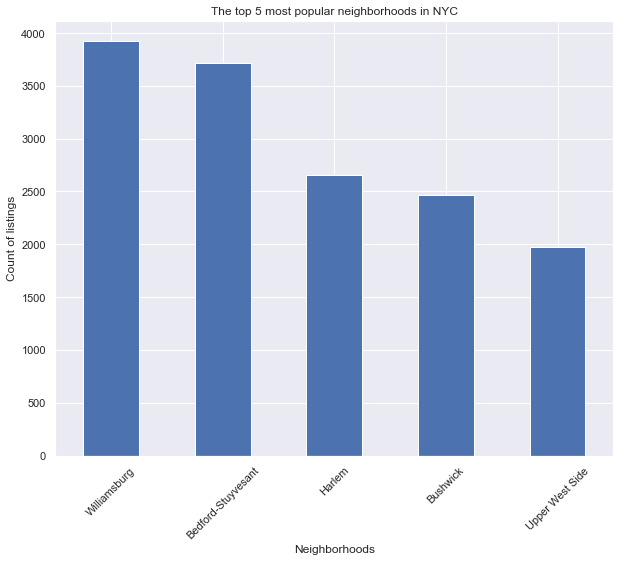

In [18]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
#choosing type of plot and lables and title for the plot
figure_2= top_neighbourhoods.plot(kind='bar')
figure_2.set_title('The top 5 most popular neighborhoods in NYC')
figure_2.set_ylabel('Count of listings')
figure_2.set_xlabel('Neighborhoods')
figure_2.set_xticklabels(figure_2.get_xticklabels(), rotation=45)

# Q3. The top 10 most reviewed listings in NYC and their Average price per night

In [19]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,Private room,60,3,480,6.70,1,0


In [20]:
avrg_price=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(avrg_price))

Average price per night: 65.4


In [21]:
#Drop Columns
airbnb.drop(['host_id','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


# Encoding categorical values

In [22]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

In [23]:
airbnb_encoded = Encode(airbnb.copy())

In [24]:
airbnb_encoded.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


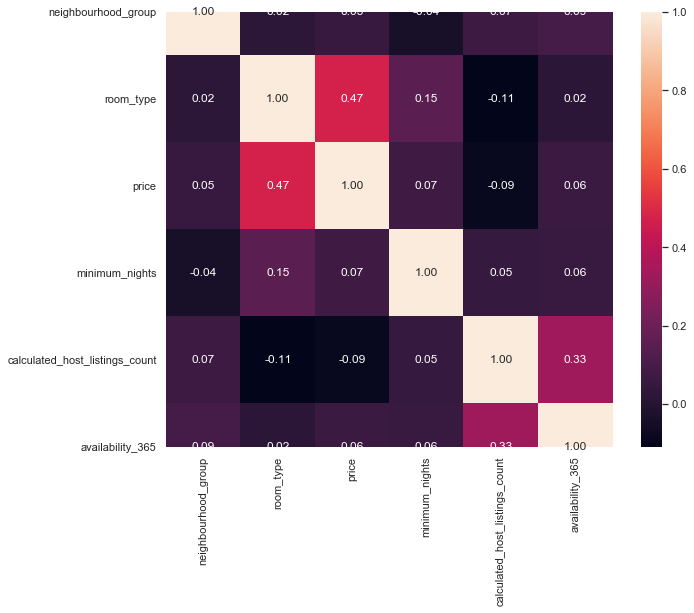

In [25]:
#show the correlation plot between variables
cor = airbnb_encoded.corr(method='kendall')
sns.heatmap(cor, annot=True, fmt='.2f');


# Model

In [26]:
#Split into explanatory and response variables
X = airbnb_encoded[['neighbourhood_group', 'room_type', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
y = airbnb_encoded['price']
#Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=250)

In [27]:
#Prepare a Linear Regression Model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.\n mean".format(r2_score(y_test, y_test_preds), len(y_test), )

'The r-squared score for the model was 0.07681370013339262 on 4890 values.\n mean'